In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#DB1C18','#DBDB3B','#51A2DB']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_csv('./data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

d:\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


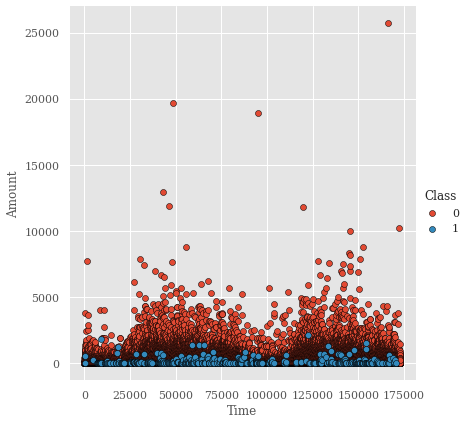

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "Time", "Amount", edgecolor="k").add_legend()
plt.show()

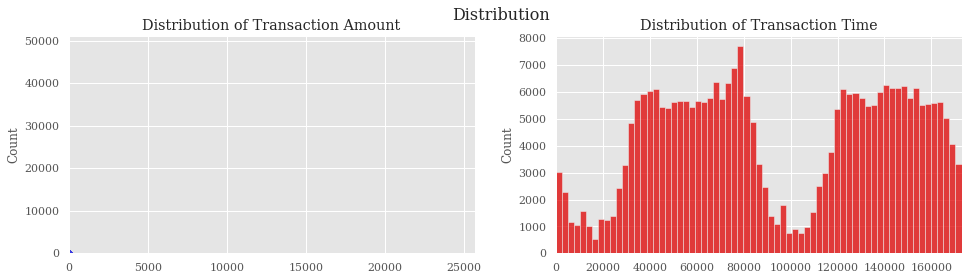

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Distribution', fontsize=16)
amount_val = data['Amount'].values
time_val = data['Time'].values
colors = ["#0101DF", "#DF0101"]
sns.histplot(amount_val, ax=ax[0], color=colors[0])
ax[0].set_title('Distribution of Transaction Amount')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color=colors[1])
ax[1].set_title('Distribution of Transaction Time')
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


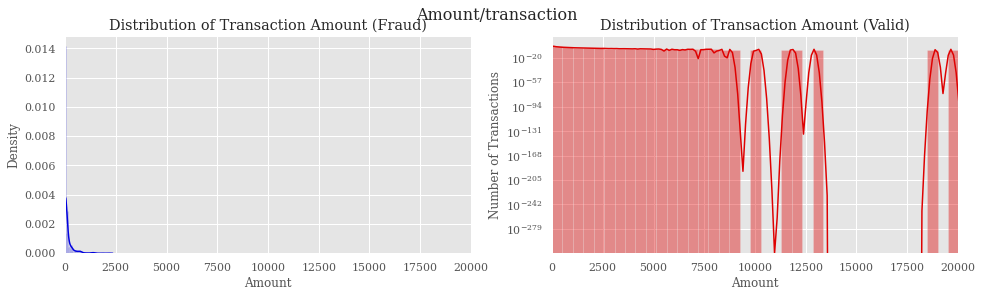

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16,4), sharex=True)
fig.suptitle('Amount/transaction', fontsize=16)
colors = ["#0101DF", "#DF0101"]

sns.distplot(data[data['Class']==1].Amount, ax=ax[0], color=colors[0])
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
# plt.xlim((0, 20000))
# plt.yscale('log')
ax[0].set_title('Distribution of Transaction Amount (Fraud)')

sns.distplot(data[data['Class']==0].Amount, ax=ax[1], color=colors[1])
ax[1].set_title('Distribution of Transaction Amount (Valid)')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

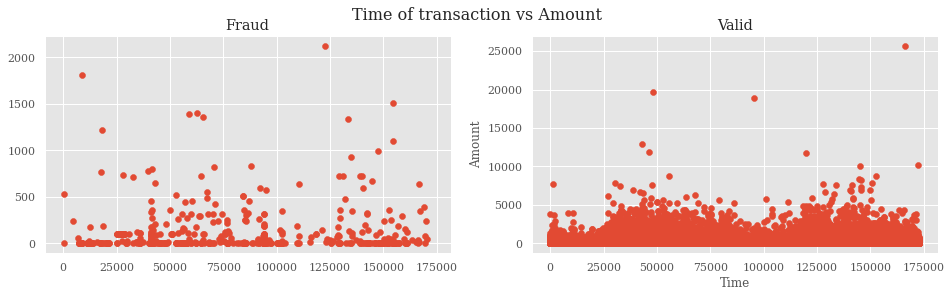

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16,4), sharex=True)
fig.suptitle('Time of transaction vs Amount', fontsize=16)
colors = ["#0101DF", "#DF0101"]

ax[0].scatter(data[data['Class']==1].Time, data[data['Class']==1].Amount)
ax[0].set_title('Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
ax[1].scatter(data[data['Class']==0].Time, data[data['Class']==0].Amount)
ax[1].set_title('Valid')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

AttributeError: 'PolyCollection' object has no property 'hist'

<Figure size 432x288 with 0 Axes>

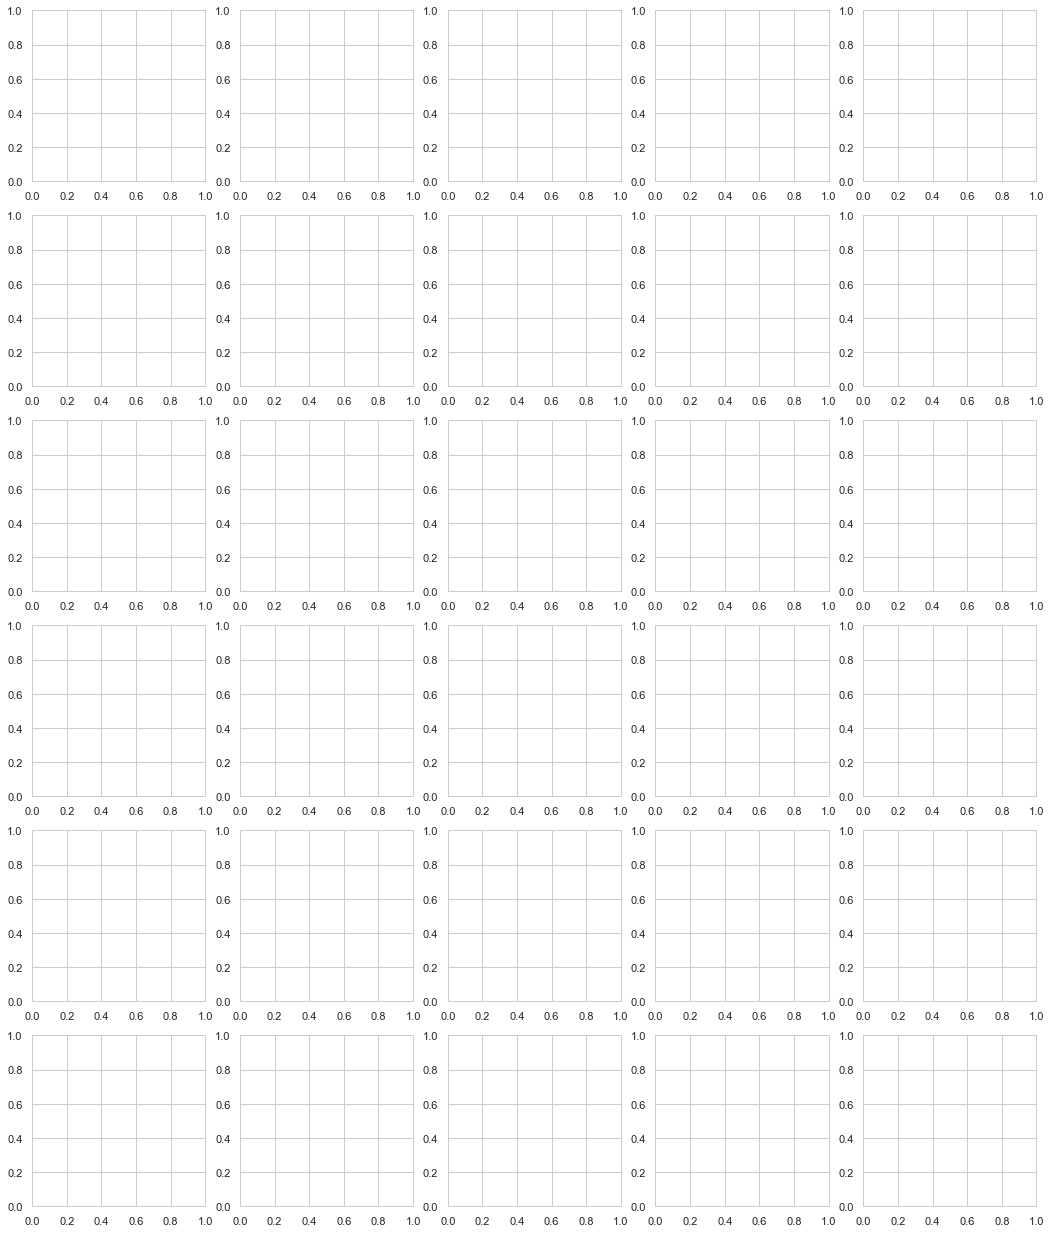

In [11]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(6,5,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(6,5,i)
        sns.histplot(df1[feature], hist=False,label=label1)
        sns.histplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()
    
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]
features = data.columns.values[:-1]
plot_feature_distribution(t0, t1, '0', '1', features)

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


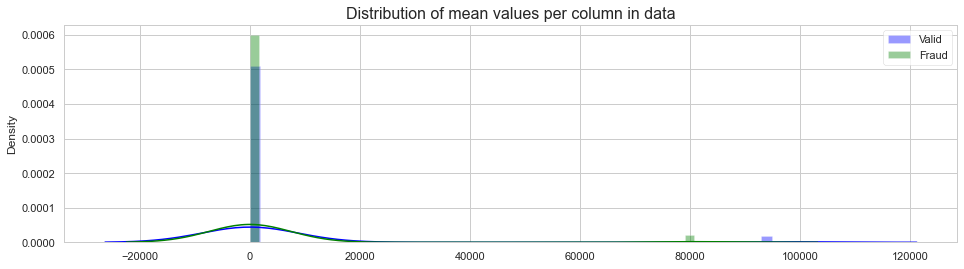

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


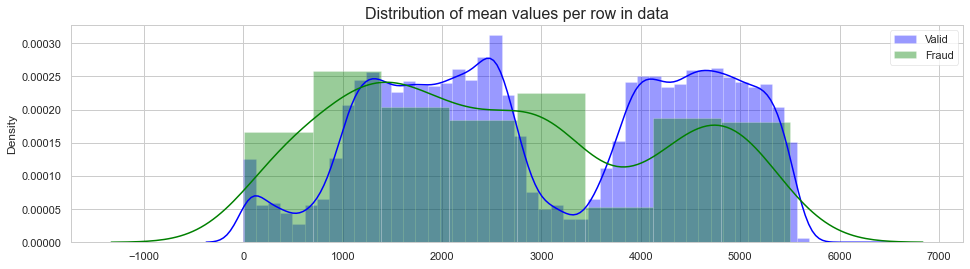

Distribution per row seems meaningless


In [12]:
plt.figure(figsize=(16,4))
plt.title("Distribution of mean values per column in data", fontsize=16)
sns.distplot(t0[features].mean(axis=0),color="blue",kde=True, label='Valid')
sns.distplot(t1[features].mean(axis=0),color="green",kde=True, label='Fraud')
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
features = data.columns.values
plt.title("Distribution of mean values per row in data", fontsize=16)
sns.distplot(t0[features].mean(axis=1),color="blue",kde=True, label='Valid')
sns.distplot(t1[features].mean(axis=1),color="green",kde=True, label='Fraud')
plt.legend()
plt.show()

print("Distribution per row seems meaningless")

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


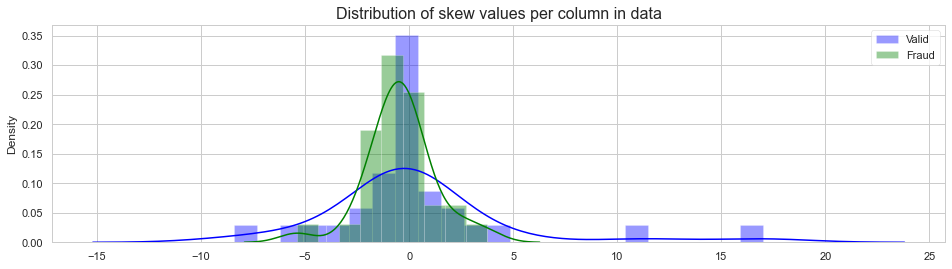

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


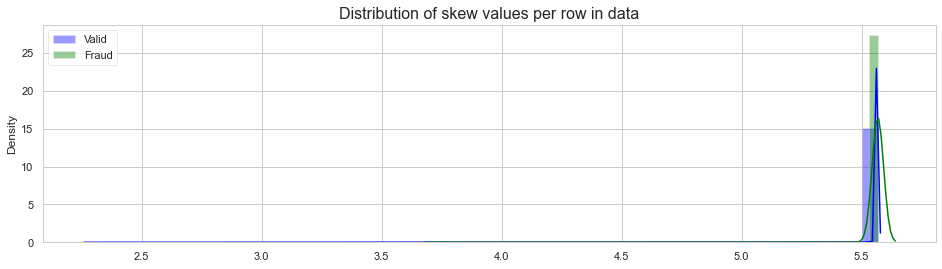

Distribution per row seems meaningless


In [13]:
plt.figure(figsize=(16,4))
plt.title("Distribution of skew values per column in data", fontsize=16)
sns.distplot(t0[features].skew(axis=0),color="blue",kde=True, label='Valid')
sns.distplot(t1[features].skew(axis=0),color="green",kde=True, label='Fraud')
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
features = data.columns.values
plt.title("Distribution of skew values per row in data", fontsize=16)
sns.distplot(t0[features].skew(axis=1),color="blue",kde=True, label='Valid')
sns.distplot(t1[features].skew(axis=1),color="green",kde=True, label='Fraud')
plt.legend()
plt.show()

print("Distribution per row seems meaningless")

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


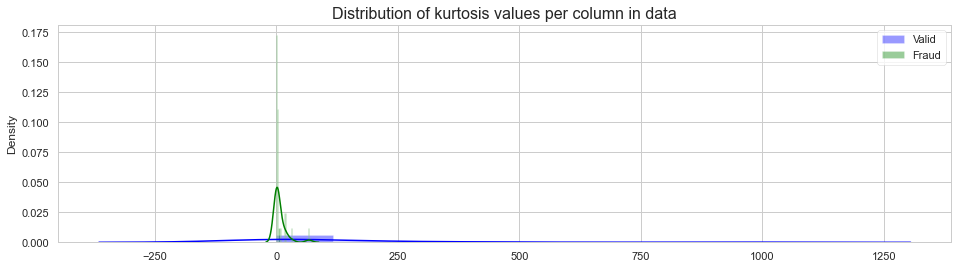

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


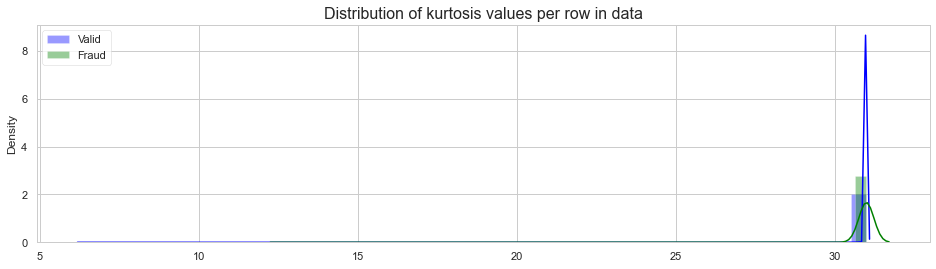

Distribution per row seems meaningless


In [14]:
plt.figure(figsize=(16,4))
plt.title("Distribution of kurtosis values per column in data", fontsize=16)
sns.distplot(t0[features].kurtosis(axis=0),color="blue",kde=True, label='Valid')
sns.distplot(t1[features].kurtosis(axis=0),color="green",kde=True, label='Fraud')
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
features = data.columns.values
plt.title("Distribution of kurtosis values per row in data", fontsize=16)
sns.distplot(t0[features].kurtosis(axis=1),color="blue",kde=True, label='Valid')
sns.distplot(t1[features].kurtosis(axis=1),color="green",kde=True, label='Fraud')
plt.legend()
plt.show()

print("Distribution per row seems meaningless")

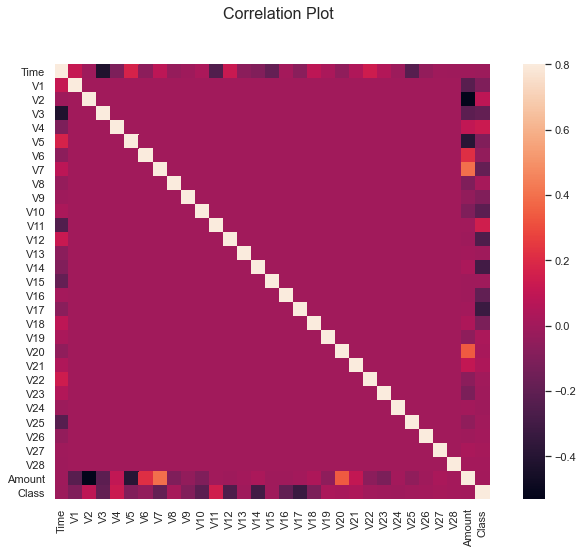

In [15]:
correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,8))
fig.suptitle('Correlation Plot', fontsize=16)
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [16]:
correlations = data[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
print("Top 5 correlated features")
print(correlations.head(10))
print("\n Least 5 correlated features")
print(correlations.tail(10))

Top 5 correlated features
  level_0 level_1             0
0      V3     V24  2.686834e-19
1     V24      V3  2.686834e-19
2     V22      V6  4.705235e-19
3      V6     V22  4.705235e-19
4     V16      V6  2.623672e-18
5      V6     V16  2.623672e-18
6      V4     V28  2.761403e-18
7     V28      V4  2.761403e-18
8     V12      V7  3.536655e-18
9      V7     V12  3.536655e-18

 Least 5 correlated features
    level_0 level_1         0
920  Amount     V20  0.339403
921     V20  Amount  0.339403
922  Amount      V5  0.386356
923      V5  Amount  0.386356
924      V7  Amount  0.397311
925  Amount      V7  0.397311
926      V3    Time  0.419618
927    Time      V3  0.419618
928      V2  Amount  0.531409
929  Amount      V2  0.531409


In [19]:
from scipy import spatial
sample_data = data.head(284800) 
samples = data.loc[284801:284807]

In [20]:
frame = []
for i in range(284801, 284807): 
    t1 = samples.loc[i]
    cls = samples.loc[i]["Class"]
    for j in range(284800):
        t2 = sample_data.loc[j]
        class_label = data.loc[j]["Class"]
        similarity = 1 - spatial.distance.cosine(t1, t2)
        if (class_label == 1):
            frame.append([class_label, similarity, j])
        
    df = pd.DataFrame(frame, columns=['Class', 'Similarity', 'Transaction ID'])
    df_sorted = df.sort_values("Similarity", ascending=False)
    print("Top 5 suspected-fraud transactions having highest similarity with transaction ID = "+str(i)+ ":")
    print(df_sorted.iloc[:5])
    print("\n")
    frame = []

Top 5 suspected-fraud transactions having highest similarity with transaction ID = 284801:
     Class  Similarity  Transaction ID
404    1.0         1.0          219025
476    1.0         1.0          263080
447    1.0         1.0          245347
399    1.0         1.0          214775
410    1.0         1.0          222419


Top 5 suspected-fraud transactions having highest similarity with transaction ID = 284802:
     Class  Similarity  Transaction ID
399    1.0         1.0          214775
404    1.0         1.0          219025
476    1.0         1.0          263080
452    1.0         1.0          248971
410    1.0         1.0          222419


Top 5 suspected-fraud transactions having highest similarity with transaction ID = 284803:
     Class  Similarity  Transaction ID
485    1.0         1.0          276071
434    1.0         1.0          238466
396    1.0         1.0          213092
194    1.0         1.0           79874
157    1.0         1.0           57248




KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import StandardScaler
data_scaled = StandardScaler().fit_transform(data.drop(['Class'], axis=1))

In [ ]:
from sklearn.decomposition import PCA
decom = PCA(svd_solver='auto')
decom.fit(df_scaled)

In [ ]:
cum_exp_ratio = np.cumsum(np.round(decom.explained_variance_ratio_,2))
print(cum_exp_ratio)
fig=plt.figure(figsize=(10,8))
ax=sns.lineplot(y=cum_exp_ratio, x=np.arange(0,len(cum_exp_ratio)))
ax=sns.scatterplot(y=cum_exp_ratio, x=np.arange(0,len(cum_exp_ratio)))
ax.set_xlabel('No of components')
ax.set_ylabel('explaned variance ratio')

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# elbow cho kiểm tra số cluster hợp lí nhất
visualize = KElbowVisualizer(model, k=(1,10))
visualize.fit(df_scaled)
visualize.poof()

In [ ]:
from sklearn.ensemble import IsolationForest
datacopy = data.copy()
datacopy.columns
to_model_cols = datacopy.columns[0:30]
clf = IsolationForest(n_estimators=10, max_samples='auto', contamination=float(.0009), 
                      max_features=1.0, bootstrap=False, n_jobs=-1, random_state=12345, verbose=0)
clf.fit(datacopy[to_model_cols])
pred = clf.predict(datacopy[to_model_cols])
datacopy['Class'] = pred
outliers = datacopy.loc[datacopy['Class']==-1]
outlier_index=list(outliers.index)
#Find the number of anomalies and normal points (points classified as "-1" are anomalous)
print(datacopy['Class'].value_counts())

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
n_outliers = len(data[data['Class']==1])
outlier_fraction = len(data[data['Class']==1])/float(len(data[data['Class']==0]))
clf = IsolationForest(n_estimators=100, max_samples=len(data.loc[:,data.columns!='Class']), 
                      contamination=outlier_fraction, random_state=12345, verbose=0)
X = data.loc[:,data.columns!='Class']
Y = data['Class']
clf.fit(X)
scores_prediction = clf.decision_function(X)
y_pred = clf.predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()

print("{}: {}".format("No. of Anomalous Points with Isolation Forest ",n_errors))
print("Accuracy Score :",accuracy_score(Y,y_pred))
print("Classification Report :")
print(classification_report(Y,y_pred))

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf_lof = LocalOutlierFactor(n_neighbors=30, algorithm='auto', contamination=.1)
standardized_data_without_class = StandardScaler().fit_transform(data.loc[:,data.columns!='Class'])
data_50k_new = standardized_data_without_class[0:50000]
data_50k_df = pd.DataFrame(data=data_50k_new)
y_pred = clf_lof.fit_predict(data_50k_df)
LOF_Scores = clf_lof.negative_outlier_factor_
LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
LOF_anomalies=data_50k_df[LOF_pred==1]

In [ ]:
LOF_Scores

In [ ]:
import numpy as np
cmap=np.array(["skyblue","red"])
def plot_lof(i):
    plt.scatter(data_50k_df.iloc[:,i],data_50k_df.iloc[:,i+1],c="skyblue",s=40, edgecolor="k")
    plt.scatter(LOF_anomalies.iloc[:,i],LOF_anomalies.iloc[:,i+1],c="red", s=40, edgecolor="k")
    plt.title("Visualize Local Outlier Factors between Feature Pair: V{} and V{}".format(i,i+1))
    plt.xlabel("V{}".format(i))
    plt.ylabel("V{}".format(i+1))

In [ ]:
plot_lof(1)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, classification_report
n_outliers = len(data[data['Class']==1])
outlier_fraction = len(data[data['Class']==1])/float(len(data[data['Class']==0]))
clflof = LocalOutlierFactor(n_neighbors=30, algorithm='auto', contamination=outlier_fraction)
X = data.loc[:,data.columns!='Class']
Y = data['Class']
y_pred = clflof.fit_predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
print("{}: {}".format("No. of Anomalous Points with Local Outlier Factors ",n_errors))
print("Accuracy Score :")
print(accuracy_score(Y,y_pred))
print("Classification Report :")
print(classification_report(Y,y_pred))

In [ ]:
from sklearn.covariance import EllipticEnvelope

clf_ee = EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=12345, store_precision=True, 
                          support_fraction=0.7)
y_predict = clf_ee.fit_predict(data_50k_df)
ee_predict = pd.Series(y_predict).replace([-1,1],[1,0])
ee_anomalies = data_50k_df[ee_predict==1]

In [ ]:
cmap=np.array(['skyblue','red'])
def plot_EE(i):
    plt.scatter(data_50k_df.iloc[:,i],data_50k_df.iloc[:,i+1],c='skyblue',s=40, edgecolor="k")
    plt.scatter(ee_anomalies.iloc[:,i],ee_anomalies.iloc[:,i+1],c='red', s=40, edgecolor="k")
    plt.title("Visualize Elliptic Envelope Anomalies between Feature Pair: V{} and V{}".format(i,i+1))
    plt.xlabel("V{}".format(i))
    plt.ylabel("V{}".format(i+1))

In [ ]:
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, classification_report
n_outliers = len(data[data['Class']==1])
outlier_fraction = len(data[data['Class']==1])/float(len(data[data['Class']==0]))
clfee = EllipticEnvelope(assume_centered=False, contamination=outlier_fraction, random_state=12345, 
                         store_precision=True, support_fraction=0.7)
X = data.loc[:,data.columns!='Class']
Y = data['Class']
y_pred = clfee.fit_predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
print("{}: {}".format("No. of Anomalous Points with Elliptic Envelope ",n_errors))
print("Accuracy Score :")
print(accuracy_score(Y,y_pred))
print("Classification Report :")
print(classification_report(Y,y_pred))

In [ ]:
from sklearn import svm
clf_svm = svm.OneClassSVM(kernel="rbf", degree=3, gamma=0.1, nu=0.01, max_iter=-1)
y_predict = clf_svm.fit_predict(data_50k_df)
svm_predict = pd.Series(y_predict).replace([-1,1],[1,0])
svm_anomalies = data_50k_df[svm_predict==1]

In [ ]:
cmap=np.array(['skyblue','red'])
def plot_OCSVM(i):
    plt.scatter(data_50k_df.iloc[:,i],data_50k_df.iloc[:,i+1],c='skyblue',s=40, edgecolor="k")
    plt.scatter(svm_anomalies.iloc[:,i],svm_anomalies.iloc[:,i+1],c='red', s=40, edgecolor="k")
    plt.title("Visualize OC-SVM Anomalies between Feature Pair: V{} and V{}".format(i,i+1))
    plt.xlabel("V{}".format(i))
    plt.ylabel("V{}".format(i+1))

In [ ]:
plot_OCSVM(1)

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, classification_report
outlier_fraction = len(data[data['Class']==1])/float(len(data[data['Class']==0]))
clfsvm = OneClassSVM(kernel="rbf", nu=outlier_fraction)
X = data.loc[:,data.columns!='Class']
Y = data['Class']
y_pred = clfsvm.fit_predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
print("{}: {}".format("No. of Anomalous Points with One-Class SVM ",n_errors))
print("Accuracy Score :")
print(accuracy_score(Y,y_pred))
print("Classification Report :")
print(classification_report(Y,y_pred))